# Colab


*   ##  mount drive

*   ## download from link directly to your drive

*   ## unzip a folder in drive




In [1]:
# # to be able to read and add files to your google drive
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [2]:
#!pip install wget

In [3]:
# #download from a link

# import wget
# url =  '' ## the download link
# destination = '/content/drive/My Drive/CIT651/heart.zip'  
# wget.download(url, destination)


In [4]:
# #UnZip file on drive

# import zipfile
# zip_ref = zipfile.ZipFile('/content/drive/My Drive/CIT651/heart.zip', 'r')
# zip_ref.extractall('/content/drive/My Drive/CIT651/')
# zip_ref.close()


#  **Pandas**

# Read CSV, Crosstab

In [5]:
# start with pandas
import pandas as pd

In [6]:
#read csv file

file = 'heart.csv'
df = pd.read_csv(file)

# display records, shapes and data types

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* **display the last 3 records of the table**

In [8]:
df.tail(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


 **display the shape and the size of the table**

* **shape**

In [9]:
df.shape

(303, 14)

* **size:** total number of cells

In [10]:
df.size

4242

* **number of samples in the dataset**

In [11]:
len(df)

303

* **print columns names**

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

* **print columns data types**

In [13]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Selection

* **select the age column**

In [14]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

* **select the first 3 rows in the age column**

In [15]:
df['age'].head(3)

0    63
1    37
2    41
Name: age, dtype: int64

* **select age, fbs and target columns**

In [16]:
df[['age','fbs','target']]

,age,fbs,target
0,63,1,1
1,37,0,1
2,41,0,1
3,56,0,1
4,57,0,1
...,...,...,...
298,57,0,0
299,45,0,0
300,68,1,0
301,57,0,0


* **select age, fbs and target columns and rows from 10 to 15:** use both loc and iloc

In [17]:
df.loc[10:15,['age','fbs','target']]

,age,fbs,target
10,54,0,1
11,48,0,1
12,49,0,1
13,64,0,1
14,58,1,1
15,50,0,1


In [18]:
df.iloc[10:15,[0,5,13]]

,age,fbs,target
10,54,0,1
11,48,0,1
12,49,0,1
13,64,0,1
14,58,1,1


# value counts

###  get the number of heart attack and non heart attack samples in the data
* **use value_counts()**

In [19]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

* **get their probabilites from the dataset**

In [20]:
df['target'].value_counts()/len(df)

1    0.544554
0    0.455446
Name: target, dtype: float64

* ### get the probabilities of each gender of people with heart attack

In [21]:
df[df['target']==1]['sex'].value_counts()/len(df[df['target']==1])

1    0.563636
0    0.436364
Name: sex, dtype: float64

### get the probabilities of heart vs no heart attack in the males

In [22]:
df[df['sex']==1]['target'].value_counts()/len(df[df['sex']==1])

0    0.550725
1    0.449275
Name: target, dtype: float64

# crosstab

In [23]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


* **rename target 1 to 'yes', and 0 to 'no'** 
* **rename gender 1 to 'male', and 0 to 'female'**


In [24]:
df['gender'] = df['sex'].map(lambda x:'male' if x==1 else 'female')
df['attack'] = df['target'].map(lambda x:'Yes' if x==1 else 'No')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,Yes


***Exercise*** 

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

* create new column 'bloodSugar' with values 'Yes' or 'No'

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

* convert chest pain column values to their corresponding meanings




In [25]:
df['bloodSugar'] = df['fbs'].map(lambda x:'yes' if x == 1 else "No")
dic = {0:'typical angina', 1:'atypical angina', 2:'non-anginal pain',3:'asymptomatic'}
df['chestPain'] = df['cp'].map(lambda x : dic.get(x,0))

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,attack,bloodSugar,chestPain
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,Yes,yes,asymptomatic
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,Yes,No,non-anginal pain
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,Yes,No,atypical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,Yes,No,atypical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,Yes,No,typical angina


In [27]:
pd.crosstab(df.attack, df.bloodSugar, margins = True)

bloodSugar,No,yes,All
attack,,,
No,116,22,138
Yes,142,23,165
All,258,45,303


In [28]:
pd.crosstab( [df.attack, df.bloodSugar], [df.gender,   df.chestPain])

gender                  female                  ...             male               
chestPain         asymptomatic atypical angina  ... non-anginal pain typical angina
attack bloodSugar                               ...                                
No     No                    0               1  ...               14             71
       yes                   0               1  ...                3             12
Yes    No                    3              15  ...               25             20
       yes                   1               1  ...               10              1

[4 rows x 8 columns]

* ## plot a stacked bar to visualize the gender vs attack

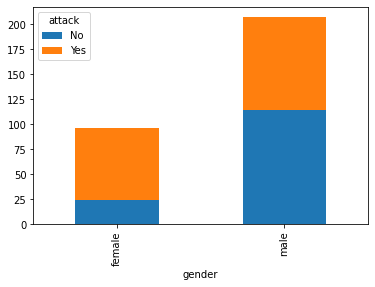

In [29]:
pd.crosstab(df['gender'],df['attack']).plot(kind = 'bar',stacked = True)

[Pandas Crosstab](https://pbpython.com/pandas-crosstab.html)

In [30]:
df1 = df[['age', 'target']][:3]
df1

,age,target
0,63,1
1,37,1
2,41,1


In [31]:
df1.rename(columns = {'target':'heart_attack'})

,age,heart_attack
0,63,1
1,37,1
2,41,1


In [32]:
df1.T  ## transpose of the table

,0,1,2
age,63,37,41
target,1,1,1


# Addition

In [33]:
df2 = df[['age', 'target']][:3]
df3 = df[['age', 'target']][3:5]

In [34]:
df2

,age,target
0,63,1
1,37,1
2,41,1


In [35]:
df3

,age,target
3,56,1
4,57,1


In [36]:
df2.append(df3)

,age,target
0,63,1
1,37,1
2,41,1
3,56,1
4,57,1


In [37]:
df2

,age,target
0,63,1
1,37,1
2,41,1


# Iteration / Sorting

In [38]:
for key in df:
    print(key)
    

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target
gender
attack
bloodSugar
chestPain


In [39]:
for key, value in df2.iteritems():
  print(key, value)  ## they are just copies!

age 0    63
1    37
2    41
Name: age, dtype: int64
target 0    1
1    1
2    1
Name: target, dtype: int64


In [40]:
df[['age', 'target']].sort_values(['target', 'age'])[:5]  ## sort by 'age' column 

,age,target
227,35,0
239,35,0
259,38,0
212,39,0
175,40,0


# from pandas to numpy

In [41]:
import numpy as np

In [42]:
age_cp = df[['age', 'cp']][:3].values

In [43]:
type(age_cp)

numpy.ndarray

In [44]:
age_cp

array([[63,  3],
       [37,  2],
       [41,  1]])

In [45]:
df[['age', 'cp']][:3].values

array([[63,  3],
       [37,  2],
       [41,  1]])

In [46]:
df3=pd.DataFrame(np.random.rand(3,3),index=['X','Y','Z'],columns=['C1','C2','C3'])
print(df3)

         C1        C2        C3
X  0.774311  0.625146  0.344976
Y  0.832856  0.462216  0.496459
Z  0.866621  0.734918  0.679938
